# Wrap Up Quiz

Quiz based on the dataset `blood_transfusion.csv`

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/blood_transfusion.csv')
df.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,donated
1,0,13,3250,28,donated
2,1,16,4000,35,donated
3,2,20,5000,45,donated
4,1,24,6000,77,not donated


In [3]:
data = df.drop(columns='Class')
target = df['Class']

In [4]:
# Q1
target.value_counts()

not donated    570
donated        178
Name: Class, dtype: int64

Q1) We are solving a binary classification problem and as we can see the proportion of the class counts are imbalanced with the `not donated` class over 4 times bigger than the other class

In [5]:
# Q2)
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

In [6]:
model = DummyClassifier(strategy="most_frequent")
res = cross_val_score(model, data, target, cv=10)

In [7]:
print(f" Accuracy score: {res.mean():.3f}")

 Accuracy score: 0.762


In [8]:
res = cross_val_score(model, data, target, cv=10, 
                      scoring='balanced_accuracy')
print(f" Accuracy score: {res.mean():.3f}")

 Accuracy score: 0.500


k-nearest neighbors is based on computing some distances. Features need to be normalized to contribute approximately equally to the distance computation.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [10]:
model = make_pipeline(StandardScaler(), KNeighborsClassifier())
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [11]:
from sklearn.model_selection import cross_validate

In [12]:
results = cross_validate(model, data, target, cv=10, n_jobs=2, return_train_score=True)

In [13]:
results

{'fit_time': array([0.02970791, 0.12580204, 0.01468492, 0.01969504, 0.08310175,
        0.03298211, 0.02061701, 0.01358223, 0.00820613, 0.00778389]),
 'score_time': array([0.01429105, 0.030164  , 0.01896501, 0.10087991, 0.03646231,
        0.02295589, 0.02298212, 0.01197791, 0.01560092, 0.00576305]),
 'test_score': array([0.37333333, 0.4       , 0.56      , 0.70666667, 0.73333333,
        0.76      , 0.68      , 0.78666667, 0.74324324, 0.78378378]),
 'train_score': array([0.84249629, 0.81575037, 0.80534918, 0.82763744, 0.82020802,
        0.82763744, 0.82169391, 0.8127786 , 0.82195846, 0.81750742])}

In [14]:
print(f"Accuracy train score: {results['train_score'].mean():.3f} +/- {results['train_score'].std():.3f}")
print(f"Accuracy test score: {results['test_score'].mean():.3f} +/- {results['test_score'].std():.3f}")


Accuracy train score: 0.821 +/- 0.010
Accuracy test score: 0.653 +/- 0.147


The  training accuracy has a much higher mean score with little standard deviation in comparison to the testing accuracy. This clearly means that the model overfits and already capture some noises from the data. However, the training score is not that high, it seems like the model prediction is not specially good.

We will now study the effect of the parameter `n_neighbors` on the train and test score using a validation curve.  
Also, use a 5-fold cross-validation and compute the balanced accuracy score instead fo the default accuracy score (check the `scoring` parameter). Finally, plot the average train and test scores for the different value of the hyperparameter.

In [16]:
from sklearn.model_selection import validation_curve

In [19]:
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [22]:
# We will use the following parameter range:
param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]

train_scores, test_scores = validation_curve(model, data, target, 
                                             param_name='kneighborsclassifier__n_neighbors',
                                             param_range=param_range,
                                             cv=5, n_jobs=2)

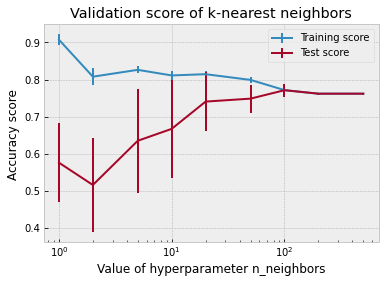

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('bmh')
plt.errorbar(param_range, train_scores.mean(axis=1), yerr=train_scores.std(axis=1), label="Training score")
plt.errorbar(param_range, test_scores.mean(axis=1), yerr=test_scores.std(axis=1), label="Test score")
plt.xscale("log")
plt.legend()
plt.xlabel(r"Value of hyperparameter n_neighbors")
plt.ylabel("Accuracy score ")
plt.title("Validation score of k-nearest neighbors");

Looking at the curve we can clearly identify the over-fitting regime of the k-nearest neighbors classifier when `k < 10`. The best setting is around `k=20`. However, it is not enough when considering that the dummy classifier reach the same accuracy score. Für `k >= 100` the model is underfitting the data.